In [1]:
# Test setup: Import necessary libraries
import asyncio
import yaml
from skills import financial_skill, sentiment_skill, summary_skill
from agent_kernel import create_kernel
import requests

In [2]:
# Load model config (for API keys and models)
with open("config/model_config.yaml", "r") as f:
    config = yaml.safe_load(f)

config


{'openai': {'model': 'gpt-3.5-turbo',
  'api_key': ''},
 'huggingface': {'model': 'meta-llama/Llama-2-7b-chat-hf',
  'api_key': ''}}

In [3]:
# Test the financial analysis function
ticker = "AAPL"
result = await financial_skill.analyze_stock(ticker)
print(result)


AAPL Analysis:
Price: 222.57
MA(5): 221.60
EMA(10): 220.95
Volatility: 2.2349
RSI: 56.75
MACD: -0.42
Signal: -1.11
Trend: Uptrend
Plot saved at outputs/AAPL_plot.png


In [4]:
type(result)

str

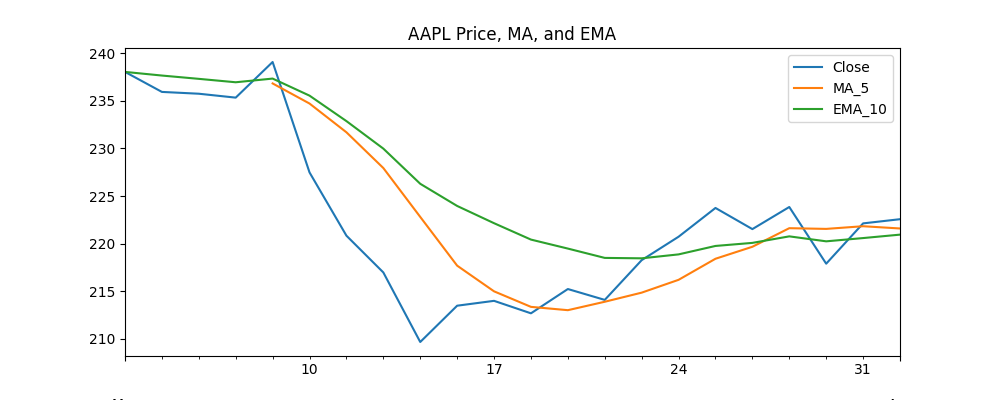

In [5]:
# Check plot was saved successfully
from IPython.display import Image, display
display(Image(filename=f"outputs/{ticker}_plot.png"))


In [6]:
# Test Finviz-based sentiment analysis
sentiment_result = await sentiment_skill.get_sentiment(ticker)
print(sentiment_result)


News Sentiment for AAPL (last 20 headlines):
- Rocket acquires Mr. Cooper, Musks xAI acquires X: Morning Buzz → Positive (0.92)
- Apple's iOS 18.4 Expands AI Features Amid Siri Delay, Citi Sees Stock Opportunity → Positive (0.56)
- Magnificent Seven Stocks: Amazon, Google, Tesla Rally; Nvidia Reverses Higher → Negative (0.74)
- What 'Magnificent 7' stocks need to show to revive the trade → Positive (0.64)
- Giverny Capital Inc. 2024 Annual Letter → Positive (0.94)
- 3 Reasons To Avoid Apple Stock → Positive (0.92)
- Warren Buffett Stocks: What's Inside Berkshire Hathaway's Portfolio? → Positive (0.91)
- Zacks Investment Ideas feature highlights: Amazon, Meta Platforms, Microsoft, Apple, Alphabet, Tesla and Nvidia → Positive (0.93)
- Jim Cramer's Strategic Insight on Apple (AAPL): CEO Tim Cook Pleases Everyone - But Is That a Problem? → Positive (0.62)
- Apple Stock Nears Citis Worst-Case. It Remains a Buy Even After Siri Delay. → Negative (0.76)
- Cramer's Mad Dash: Apple → Positive (0

In [27]:
from skills import financial_skill, sentiment_skill, summary_skill


In [7]:
# Test summary creation
text_input = "\n" + result + "\n\n List of articles and followed by their sentiment and confidence\n\n" + sentiment_result + "\n"
# summary_result = await summary_skill.summarize(text_input)
# print(summary_result)


In [7]:
from semantic_kernel.kernel import Kernel
for i in (sorted(dir(Kernel))):
    print(i)

__abstractmethods__
__annotations__
__class__
__class_getitem__
__class_vars__
__copy__
__deepcopy__
__delattr__
__dict__
__dir__
__doc__
__eq__
__fields_set__
__format__
__ge__
__get_pydantic_core_schema__
__get_pydantic_json_schema__
__getattr__
__getattribute__
__getstate__
__gt__
__hash__
__init__
__init_subclass__
__iter__
__le__
__lt__
__module__
__ne__
__new__
__pretty__
__private_attributes__
__pydantic_complete__
__pydantic_computed_fields__
__pydantic_core_schema__
__pydantic_custom_init__
__pydantic_decorators__
__pydantic_extra__
__pydantic_fields__
__pydantic_fields_set__
__pydantic_generic_metadata__
__pydantic_init_subclass__
__pydantic_parent_namespace__
__pydantic_post_init__
__pydantic_private__
__pydantic_root_model__
__pydantic_serializer__
__pydantic_validator__
__reduce__
__reduce_ex__
__replace__
__repr__
__repr_args__
__repr_name__
__repr_recursion__
__repr_str__
__rich_repr__
__setattr__
__setstate__
__signature__
__sizeof__
__slots__
__str__
__subclasshook__
_

In [45]:
import openai
def classify_prompt(prompt):
    """
    Classifies the given user prompt as 'valid' or 'invalid' based on predefined stock ticker formats.

    Parameters:
    - prompt (str): The user input to classify.

    Returns:
    - str: 'valid' if the prompt adheres to specified formats, otherwise 'invalid'.
    """
    # Define the instruction for the model
    with open("config/model_config.yaml", "r") as f:
        config = yaml.safe_load(f)
    
    openai.api_key = config["openai"]["api_key"]
    instruction = (
        "Please classify the following user prompt as 'valid' or 'invalid'. "
        "A valid prompt relates to stock tickers in the formats: "
        "(1) a single ticker symbol could be lower but should exist in company, "
        "(2) a ticker symbol followed by a time frame (e.g., 'AAPL for last 5 days at 1hr interval'), or "
        "(3) multiple ticker symbols separated by commas (e.g., 'TSLA, AAPL, Google',META). "
        "Respond with only 'valid' or 'invalid'."
    )

    # Combine the instruction with the user prompt
    full_prompt = f"{instruction}\n\nUser Prompt: '{prompt}'"

    try:
        # Send the prompt to the OpenAI API
        response = openai.completions.create(
            model="gpt-3.5-turbo-instruct",  # Use the appropriate engine
            prompt=full_prompt,
            max_tokens=10  # Limit the response length
        )
        # Extract and return the classification result
        result = response.choices[0].text.strip().lower()
        if result in ['valid', 'invalid']:
            return result
        else:
            return 'invalid'  # Default to 'invalid' for unexpected responses
    except Exception as e:
        print(f"An error occurred: {e}")
        return 'invalid'


In [47]:
user_prompt = "nvda"
classification = classify_prompt(user_prompt)
print(f"The prompt is classified as: {classification}")


The prompt is classified as: invalid


In [39]:
import subprocess

subprocess.Popen([
    "streamlit", "run", "app.py", 
    "--server.headless=true", 
    "--browser.gatherUsageStats=false"
])

print("✅ App is starting... Open http://localhost:8501 in your browser.")


✅ App is starting... Open http://localhost:8501 in your browser.
